In [10]:
import pandas as pd
import os

### Task 1: Merging All (12 months) of sales into a single file.

In [42]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

# empty all df
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)

### Read all merged data

In [43]:
data = pd.read_csv('all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the Data

#### Drop  NaN rows
Hapus baris yang mengandung NaN/null, menggunakan dropna(how="any/all") 

any = jika row setidaknya mengandung 1 kolom yang berisi **NaN**

all = jika row semuannya **NaN**

In [63]:
nan_df = data[data.isna().any(axis=1)]
# lihat banyak jumlah rows dan column
#nan_df.shape

#dropna() drop rows which contains NaN
data = data.dropna(how="all")

Terdapat error 2 karakter awal adalah Or bukan int ``ValueError: invalid literal for int() with base 10: 'Or'`` 
#### Find 'Or' and delete it

Update variable `data` sort semua data 'Order Date' yang tidak Berawalan 'Or...'

In [77]:
#temp_df = data[data['Order Date'].str[0:2] == 'Or']
data = data[data['Order Date'].str[0:2] != 'Or']
#temp_df.shape
#all_data.head()

#### Convert column to to the desire data type
e.g: tipe data kolom 'Quanity Ordered' adalah `object` ubah ke `int` misalnya.

In [87]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered']) # change data type to int

data['Price Each'] = pd.to_numeric(data['Price Each']) # change data type to float

## Augment data with additional columns

### Task 2: Add "Month" Column
Tambahkan tabel 'Month' yang diambil dari 2 karakter pertama dari kolom 'Order Date'

In [88]:
data['Month'] = data['Order Date'].str[0:2]
data.shape
data.head(9)

#ubah ke type integer untuk ambil 2 char awal dari kolom "Order Data"
data['Month'] = data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add "Sales" Column

In [92]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()
#data.info()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Question 1: What was the best month for sales? and How much income was earned that month?

In [182]:
data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales,Hour
Month,,,,
1,10903,1.811768e+06,1.822257e+06,139485
2,13449,2.188885e+06,2.202022e+06,172669
3,17005,2.791208e+06,2.807100e+06,218969
4,20558,3.367671e+06,3.390670e+06,262259
5,18667,3.135125e+06,3.152607e+06,238780
6,15253,2.562026e+06,2.577802e+06,195528
7,16072,2.632540e+06,2.647776e+06,206169
8,13448,2.230345e+06,2.244468e+06,172289
9,13109,2.084992e+06,2.097560e+06,168513


#### Plot the data which is the best month for sales

In [101]:
rslt = data.groupby('Month').sum()

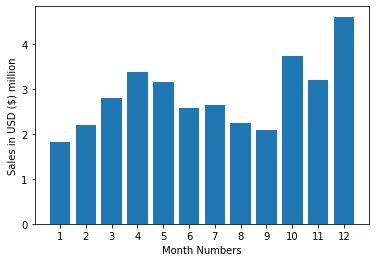

In [111]:
import matplotlib.pyplot as plt

bln = range(1,13)

plt.bar(bln, rslt['Sales']/10**6)
plt.xticks(bln)
plt.ylabel('Sales in USD ($) million')
plt.xlabel('Month Numbers')
plt.show()

### Task 4: Add a "City" Column

### Question 2: What city had the highest number of sales?

Untuk mendapatkan nama Kota di kolom `Purchase Address` gunakan fungsi `.apply()`

##### Menghapus Kolom

In [147]:
data['Bakal dihapus'] = "Hehe"
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Bakal dihapus
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Hehe
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Hehe
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Hehe
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Hehe
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Hehe


In [148]:
data = data.drop(columns = 'Bakal dihapus')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [158]:
#make function
def get_city(address):
    return address.split(',')[1]

def get_state(state):
    return state.split(',')[2].split(' ')[1]
## cara 1
#data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1])

## cara 2
#data['City'] = data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)+')')

## cara 3
data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [162]:
rslt = data.groupby('City').sum()
rslt

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


[' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)', ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)', ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)']


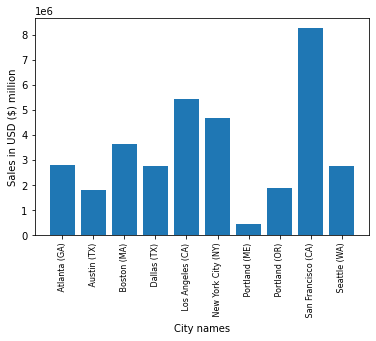

In [170]:
import matplotlib.pyplot as plt

#cities = data['City'].unique()
cities = [city for city, df in data.groupby('City')]

plt.bar(cities, rslt['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($) million')
plt.xlabel('City names')
plt.show()

### Question 3: What time should we display advertisments to maximize likelihood of custommer's buying product?

Convert `Order Data` into datetime format, `to_datetime`

In [189]:
#data['Order Date'] = pd.to_datetime(data['Order Date'])

# tambah kolom Hour
data['Hour Order'] = data['Order Date'].dt.hour
data['Minute Order'] = data['Order Date'].dt.minute

data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour Order,Minute Order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7,46


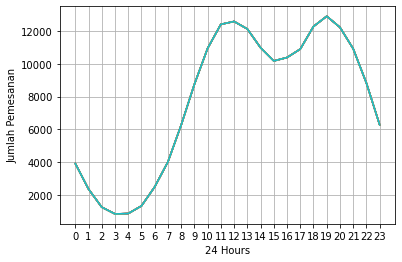

In [196]:
hours = [hour for hour, df in data.groupby('Hour Order')]

plt.plot(hours, data.groupby(['Hour Order']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('24 Hours')
plt.ylabel('Jumlah Pemesanan')
plt.show()

### Question 4: What products are the most often sold together?